In [118]:
import tensorflow as tf
from tensorflow.keras import models, layers, Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
# https://finance.yahoo.com/quote/TSLA/history?period1=1290643200&period2=1669334400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
df = pd.read_csv("./TSLA_2010-2022.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
3,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
4,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500
...,...,...,...,...,...,...,...
3119,2022-11-17,183.960007,186.160004,180.899994,183.169998,183.169998,64336000
3120,2022-11-18,185.050003,185.190002,176.550003,180.190002,180.190002,75904900
3121,2022-11-21,175.850006,176.770004,167.539993,167.869995,167.869995,92882700
3122,2022-11-22,168.630005,170.919998,166.190002,169.910004,169.910004,78452300


In [120]:
df['Date'] = pd.to_datetime(df['Date'])
df.Date

0      2010-06-30
1      2010-07-01
2      2010-07-02
3      2010-07-06
4      2010-07-07
          ...    
3119   2022-11-17
3120   2022-11-18
3121   2022-11-21
3122   2022-11-22
3123   2022-11-23
Name: Date, Length: 3124, dtype: datetime64[ns]

In [121]:
df.set_index('Date', inplace=True)

In [122]:
df.index

DatetimeIndex(['2010-06-30', '2010-07-01', '2010-07-02', '2010-07-06',
               '2010-07-07', '2010-07-08', '2010-07-09', '2010-07-12',
               '2010-07-13', '2010-07-14',
               ...
               '2022-11-10', '2022-11-11', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-21',
               '2022-11-22', '2022-11-23'],
              dtype='datetime64[ns]', name='Date', length=3124, freq=None)

In [123]:
df['2019-01']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500
2019-01-09,22.366667,22.900000,22.098000,22.568666,22.568666,81493500
2019-01-10,22.293333,23.025999,22.119333,22.997999,22.997999,90846000
2019-01-11,22.806000,23.227333,22.584667,23.150667,23.150667,75586500
2019-01-14,22.825333,22.833332,22.266666,22.293333,22.293333,78709500


In [124]:
df201901 = df['2019-01']

In [125]:
df201901 = df201901.iloc[:, -2]
df201901

Date
2019-01-02    20.674667
2019-01-03    20.024000
2019-01-04    21.179333
2019-01-07    22.330667
2019-01-08    22.356667
2019-01-09    22.568666
2019-01-10    22.997999
2019-01-11    23.150667
2019-01-14    22.293333
2019-01-15    22.962000
2019-01-16    23.070000
2019-01-17    23.153999
2019-01-18    20.150667
2019-01-22    19.927999
2019-01-23    19.172667
2019-01-24    19.434000
2019-01-25    19.802668
2019-01-28    19.758667
2019-01-29    19.830667
2019-01-30    20.584667
2019-01-31    20.468000
Name: Adj Close, dtype: float64

# 시각화

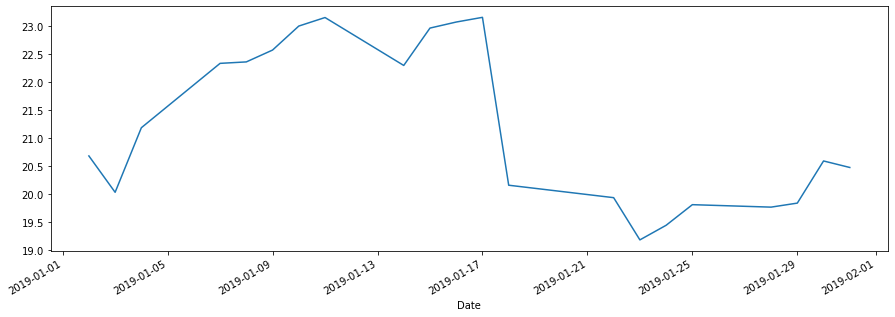

In [126]:
plt.figure(figsize=(15,5))
df201901.plot()
plt.show()

# 데이터 분리

In [127]:
len(df201901)

21

In [128]:
from sklearn.model_selection import TimeSeriesSplit

ts = 1 # test_size
mts = len(df201901.index) - ts # max_train_size
tss = TimeSeriesSplit(n_splits=int(len(df201901)/ts)-1, max_train_size=mts, test_size=ts)
for idx, (trn, val) in enumerate(tss.split(df201901)):
    print(idx, trn, val)

0 [0] [1]
1 [0 1] [2]
2 [0 1 2] [3]
3 [0 1 2 3] [4]
4 [0 1 2 3 4] [5]
5 [0 1 2 3 4 5] [6]
6 [0 1 2 3 4 5 6] [7]
7 [0 1 2 3 4 5 6 7] [8]
8 [0 1 2 3 4 5 6 7 8] [9]
9 [0 1 2 3 4 5 6 7 8 9] [10]
10 [ 0  1  2  3  4  5  6  7  8  9 10] [11]
11 [ 0  1  2  3  4  5  6  7  8  9 10 11] [12]
12 [ 0  1  2  3  4  5  6  7  8  9 10 11 12] [13]
13 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] [14]
14 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] [15]
15 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] [16]
16 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] [17]
17 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] [18]
18 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] [19]
19 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [20]


In [129]:
ndf = np.zeros([val[0], 21])
ndf = pd.DataFrame(ndf)
ndf

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
mts = 19
ts = 2
tss = TimeSeriesSplit(n_splits=int(len(df201901)/ts)-1, max_train_size=mts, test_size=ts)
for idx, (trn, val) in enumerate(tss.split(df201901)):
    print(idx, trn, val)

0 [0 1 2] [3 4]
1 [0 1 2 3 4] [5 6]
2 [0 1 2 3 4 5 6] [7 8]
3 [0 1 2 3 4 5 6 7 8] [ 9 10]
4 [ 0  1  2  3  4  5  6  7  8  9 10] [11 12]
5 [ 0  1  2  3  4  5  6  7  8  9 10 11 12] [13 14]
6 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] [15 16]
7 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] [17 18]
8 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] [19 20]


In [131]:
mts = 19
ts = 3
tss = TimeSeriesSplit(n_splits=int(len(df201901)/ts)-1, max_train_size=mts, test_size=ts)
for idx, (trn, val) in enumerate(tss.split(df201901)):
    print(idx, trn, val)

0 [0 1 2] [3 4 5]
1 [0 1 2 3 4 5] [6 7 8]
2 [0 1 2 3 4 5 6 7 8] [ 9 10 11]
3 [ 0  1  2  3  4  5  6  7  8  9 10 11] [12 13 14]
4 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] [15 16 17]
5 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] [18 19 20]


In [132]:
ts = 1 # test_size
mts = len(df201901.index) - ts # max_train_size
tss = TimeSeriesSplit(n_splits=int(len(df201901)/ts)-1, max_train_size=mts, test_size=ts)

for idx, (trn, val) in enumerate(tss.split(df201901)):
    if idx == 0:
        print(idx)
        print(trn, val)
        print(len(df201901.iloc[trn]))
        print(df201901.iloc[trn].values)
        print(df201901.iloc[val].values)
    ndf.iloc[idx, -(len(df201901.iloc[trn])+1):-1] = df201901.iloc[trn].values
    ndf.iloc[idx, -1] = df201901.iloc[val].values

0
[0] [1]
1
[20.674667]
[20.024]


In [133]:
ndf

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.674667,20.024000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.674667,20.024000,21.179333
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.674667,20.024000,21.179333,22.330667
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.674667,20.024000,21.179333,22.330667,22.356667
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,20.674667,20.024000,21.179333,22.330667,22.356667,22.568666
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,20.674667,20.024000,21.179333,22.330667,22.356667,22.568666,22.997999
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,20.674667,20.024000,21.179333,22.330667,22.356667,22.568666,22.997999,23.150667
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,20.674667,20.024000,21.179333,22.330667,22.356667,22.568666,22.997999,23.150667,22.293333
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.674667,20.024000,21.179333,22.330667,22.356667,22.568666,22.997999,23.150667,22.293333,22.962000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.024000,21.179333,22.330667,22.356667,22.568666,22.997999,23.150667,22.293333,22.962000,23.070000


In [134]:
# 1D convolutions and recurrent layers use(batch_size, sequence_length, features)

# 1번 모델: 2개의 히든 레이어, 각 8개씩 노드 구성 최종 1개 결과 예측
# 2번 모델: 1개의 1d convolution layer, 2개의 히든 레이어 8개 노드 (filter: 2개, 사이즈: 3)
# 3번 모델: 1개의 1d convolution layer, 2개의 히든 레이어 8개 노드 (filter: 10, 사이즈: 10)

# 예측: 2019-2월 전처리
# 1번, 2번, 3번 모델: 예측 후 결과 그래프 구현 (예측 결과 + 실제값 비교)

X = ndf.iloc[:, :-1].values
y = ndf.iloc[:, -1].values
X.shape

(20, 20)

# DL 모델 추가

In [136]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(None, X.shape[1],))
x = keras.layers.Dense(8, activation='relu')(inputs)
x = keras.layers.Dense(8, activation='relu')(x)
output = keras.layers.Dense(1)(x)

full_model = keras.Model(inputs, output)

full_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mse")
full_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, None, 20)]        0         
_________________________________________________________________
dense_10 (Dense)             (None, None, 8)           168       
_________________________________________________________________
dense_11 (Dense)             (None, None, 8)           72        
_________________________________________________________________
dense_12 (Dense)             (None, None, 1)           9         
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [137]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(None, X.shape[1],))
x = tf.keras.layers.Conv1D(filters=2, kernel_size=3, padding='same', activation='relu')(inputs)
x = keras.layers.Dense(8, activation='relu')(x)
x = keras.layers.Dense(8, activation='relu')(x)
output = keras.layers.Dense(1)(x)

full_model1 = keras.Model(inputs, output)

full_model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mse")
full_model1.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, None, 20)]        0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 2)           122       
_________________________________________________________________
dense_13 (Dense)             (None, None, 8)           24        
_________________________________________________________________
dense_14 (Dense)             (None, None, 8)           72        
_________________________________________________________________
dense_15 (Dense)             (None, None, 1)           9         
Total params: 227
Trainable params: 227
Non-trainable params: 0
_________________________________________________________________


In [138]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(None, X.shape[1],))
x = tf.keras.layers.Conv1D(filters=30, kernel_size=5, padding='same', activation='relu')(inputs)
x = keras.layers.Dense(8, activation='relu')(x)
x = keras.layers.Dense(8, activation='relu')(x)
output = keras.layers.Dense(1)(x)

full_model2 = keras.Model(inputs, output)

full_model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mse")
full_model2.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, None, 20)]        0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 30)          3030      
_________________________________________________________________
dense_16 (Dense)             (None, None, 8)           248       
_________________________________________________________________
dense_17 (Dense)             (None, None, 8)           72        
_________________________________________________________________
dense_18 (Dense)             (None, None, 1)           9         
Total params: 3,359
Trainable params: 3,359
Non-trainable params: 0
_________________________________________________________________


In [139]:
X_trn = X.reshape(-1, 1, X.shape[1])
X_trn

array([[[ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      ,  0.      ,  0.      , 20.674667]],

       [[ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      ,  0.      , 20.674667, 20.024   ]],

       [[ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      , 20.674667, 20.024   , 21.179333]],

       [[ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      , 20.674667, 

In [140]:
hist = full_model.fit(X_trn, y, epochs=500, batch_size=1)

Epoch 1/500
20/20 [==============================] - 0s 673us/step - loss: 235.8064
Epoch 2/500
20/20 [==============================] - 0s 518us/step - loss: 82.3315
Epoch 3/500
20/20 [==============================] - 0s 511us/step - loss: 37.2253
Epoch 4/500
20/20 [==============================] - 0s 511us/step - loss: 22.2742
Epoch 5/500
20/20 [==============================] - 0s 523us/step - loss: 14.2503
Epoch 6/500
20/20 [==============================] - 0s 490us/step - loss: 11.9677
Epoch 7/500
20/20 [==============================] - 0s 490us/step - loss: 9.9005
Epoch 8/500
20/20 [==============================] - 0s 503us/step - loss: 7.2821
Epoch 9/500
20/20 [==============================] - 0s 476us/step - loss: 5.5092
Epoch 10/500
20/20 [==============================] - 0s 480us/step - loss: 4.8644
Epoch 11/500
20/20 [==============================] - 0s 492us/step - loss: 4.6662
Epoch 12/500
20/20 [==============================] - 0s 482us/step - loss: 4.9941
Epoch 

20/20 [==============================] - 0s 453us/step - loss: 0.8130
Epoch 197/500
20/20 [==============================] - 0s 444us/step - loss: 1.3508
Epoch 198/500
20/20 [==============================] - 0s 441us/step - loss: 0.7159
Epoch 199/500
20/20 [==============================] - 0s 438us/step - loss: 0.7658
Epoch 200/500
20/20 [==============================] - 0s 428us/step - loss: 0.6521
Epoch 201/500
20/20 [==============================] - 0s 446us/step - loss: 0.5902
Epoch 202/500
20/20 [==============================] - 0s 453us/step - loss: 0.1976
Epoch 203/500
20/20 [==============================] - 0s 452us/step - loss: 0.9587
Epoch 204/500
20/20 [==============================] - 0s 481us/step - loss: 1.6700
Epoch 205/500
20/20 [==============================] - 0s 468us/step - loss: 0.8509
Epoch 206/500
20/20 [==============================] - 0s 479us/step - loss: 0.6238
Epoch 207/500
20/20 [==============================] - 0s 479us/step - loss: 0.6312
Epoch 

20/20 [==============================] - 0s 442us/step - loss: 0.3693
Epoch 391/500
20/20 [==============================] - 0s 446us/step - loss: 0.1679
Epoch 392/500
20/20 [==============================] - 0s 439us/step - loss: 0.4414
Epoch 393/500
20/20 [==============================] - 0s 458us/step - loss: 0.9645
Epoch 394/500
20/20 [==============================] - 0s 459us/step - loss: 1.1459
Epoch 395/500
20/20 [==============================] - 0s 424us/step - loss: 1.0855
Epoch 396/500
20/20 [==============================] - 0s 441us/step - loss: 1.2794
Epoch 397/500
20/20 [==============================] - 0s 474us/step - loss: 0.8913
Epoch 398/500
20/20 [==============================] - 0s 476us/step - loss: 1.8414
Epoch 399/500
20/20 [==============================] - 0s 465us/step - loss: 1.6079
Epoch 400/500
20/20 [==============================] - 0s 474us/step - loss: 1.0740
Epoch 401/500
20/20 [==============================] - 0s 458us/step - loss: 0.4147
Epoch 

In [141]:
hist1 = full_model1.fit(X_trn, y, epochs=500, batch_size=1)

Epoch 1/500
20/20 [==============================] - 0s 561us/step - loss: 268.0291
Epoch 2/500
20/20 [==============================] - 0s 513us/step - loss: 123.4014
Epoch 3/500
20/20 [==============================] - 0s 520us/step - loss: 75.8645
Epoch 4/500
20/20 [==============================] - 0s 515us/step - loss: 53.4816
Epoch 5/500
20/20 [==============================] - 0s 527us/step - loss: 38.4020
Epoch 6/500
20/20 [==============================] - 0s 491us/step - loss: 22.4899
Epoch 7/500
20/20 [==============================] - 0s 511us/step - loss: 10.2371
Epoch 8/500
20/20 [==============================] - 0s 518us/step - loss: 4.7589
Epoch 9/500
20/20 [==============================] - 0s 509us/step - loss: 2.8466
Epoch 10/500
20/20 [==============================] - 0s 527us/step - loss: 2.3383
Epoch 11/500
20/20 [==============================] - 0s 520us/step - loss: 2.2842
Epoch 12/500
20/20 [==============================] - 0s 504us/step - loss: 3.6109
Epoc

20/20 [==============================] - 0s 642us/step - loss: 0.0172
Epoch 197/500
20/20 [==============================] - 0s 523us/step - loss: 0.1171
Epoch 198/500
20/20 [==============================] - 0s 518us/step - loss: 0.1175
Epoch 199/500
20/20 [==============================] - 0s 552us/step - loss: 0.1636
Epoch 200/500
20/20 [==============================] - 0s 593us/step - loss: 0.2833
Epoch 201/500
20/20 [==============================] - 0s 511us/step - loss: 0.1609
Epoch 202/500
20/20 [==============================] - 0s 539us/step - loss: 0.0718
Epoch 203/500
20/20 [==============================] - 0s 588us/step - loss: 0.0766
Epoch 204/500
20/20 [==============================] - 0s 631us/step - loss: 0.0531
Epoch 205/500
20/20 [==============================] - 0s 537us/step - loss: 0.0401
Epoch 206/500
20/20 [==============================] - 0s 507us/step - loss: 0.0181
Epoch 207/500
20/20 [==============================] - 0s 523us/step - loss: 0.0179
Epoch 

20/20 [==============================] - 0s 494us/step - loss: 0.0167
Epoch 391/500
20/20 [==============================] - 0s 508us/step - loss: 0.0167
Epoch 392/500
20/20 [==============================] - 0s 472us/step - loss: 0.0131
Epoch 393/500
20/20 [==============================] - 0s 486us/step - loss: 0.0053
Epoch 394/500
20/20 [==============================] - 0s 526us/step - loss: 0.0313
Epoch 395/500
20/20 [==============================] - 0s 494us/step - loss: 0.0516
Epoch 396/500
20/20 [==============================] - 0s 514us/step - loss: 0.0940
Epoch 397/500
20/20 [==============================] - 0s 527us/step - loss: 0.0858
Epoch 398/500
20/20 [==============================] - 0s 531us/step - loss: 0.1165
Epoch 399/500
20/20 [==============================] - 0s 524us/step - loss: 0.1548
Epoch 400/500
20/20 [==============================] - 0s 529us/step - loss: 0.2504
Epoch 401/500
20/20 [==============================] - 0s 532us/step - loss: 0.5821
Epoch 

In [142]:
hist2 = full_model2.fit(X_trn, y, epochs=500, batch_size=1)

Epoch 1/500
20/20 [==============================] - 0s 591us/step - loss: 170.6793
Epoch 2/500
20/20 [==============================] - 0s 583us/step - loss: 47.6145
Epoch 3/500
20/20 [==============================] - 0s 650us/step - loss: 19.8105
Epoch 4/500
20/20 [==============================] - 0s 598us/step - loss: 11.1347
Epoch 5/500
20/20 [==============================] - 0s 645us/step - loss: 7.4815
Epoch 6/500
20/20 [==============================] - 0s 608us/step - loss: 4.4700
Epoch 7/500
20/20 [==============================] - 0s 587us/step - loss: 4.0026
Epoch 8/500
20/20 [==============================] - 0s 605us/step - loss: 3.8940
Epoch 9/500
20/20 [==============================] - 0s 589us/step - loss: 1.7696
Epoch 10/500
20/20 [==============================] - 0s 584us/step - loss: 1.8313
Epoch 11/500
20/20 [==============================] - 0s 573us/step - loss: 2.0533
Epoch 12/500
20/20 [==============================] - 0s 595us/step - loss: 2.0490
Epoch 13

20/20 [==============================] - 0s 558us/step - loss: 0.0204
Epoch 197/500
20/20 [==============================] - 0s 559us/step - loss: 0.0768
Epoch 198/500
20/20 [==============================] - 0s 602us/step - loss: 0.1059
Epoch 199/500
20/20 [==============================] - 0s 571us/step - loss: 0.0395
Epoch 200/500
20/20 [==============================] - 0s 592us/step - loss: 0.3298
Epoch 201/500
20/20 [==============================] - 0s 598us/step - loss: 0.3797
Epoch 202/500
20/20 [==============================] - 0s 565us/step - loss: 0.2407
Epoch 203/500
20/20 [==============================] - 0s 560us/step - loss: 1.1004
Epoch 204/500
20/20 [==============================] - 0s 559us/step - loss: 2.0048
Epoch 205/500
20/20 [==============================] - 0s 562us/step - loss: 2.2124
Epoch 206/500
20/20 [==============================] - 0s 537us/step - loss: 1.3600
Epoch 207/500
20/20 [==============================] - 0s 569us/step - loss: 3.8366
Epoch 

20/20 [==============================] - 0s 627us/step - loss: 2.1652
Epoch 391/500
20/20 [==============================] - 0s 568us/step - loss: 1.4317
Epoch 392/500
20/20 [==============================] - 0s 562us/step - loss: 0.8366
Epoch 393/500
20/20 [==============================] - 0s 598us/step - loss: 0.1914
Epoch 394/500
20/20 [==============================] - 0s 577us/step - loss: 0.1864
Epoch 395/500
20/20 [==============================] - 0s 568us/step - loss: 0.3132
Epoch 396/500
20/20 [==============================] - 0s 579us/step - loss: 0.2617
Epoch 397/500
20/20 [==============================] - 0s 594us/step - loss: 0.0960
Epoch 398/500
20/20 [==============================] - 0s 604us/step - loss: 0.0483
Epoch 399/500
20/20 [==============================] - 0s 582us/step - loss: 0.0441
Epoch 400/500
20/20 [==============================] - 0s 584us/step - loss: 0.0612
Epoch 401/500
20/20 [==============================] - 0s 591us/step - loss: 0.0664
Epoch 

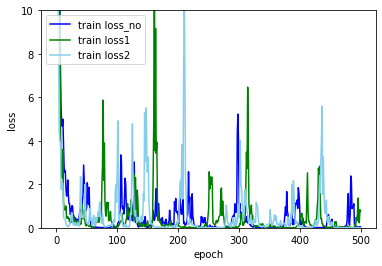

In [167]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
# acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', c='blue', label = 'train loss_no')
loss_ax.plot(hist1.history['loss'], 'y', c='green', label = 'train loss1')
loss_ax.plot(hist2.history['loss'], 'y', c='skyblue', label = 'train loss2')
# loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
# acc_ax.plot(hist.history['accuracy'], 'b', label = 'train accuracy')
# acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
# acc_ax.set_xlabel('accuracy')

loss_ax.legend(loc = 'upper left')
# acc_ax.legend(loc = 'lower left')

loss_ax.set_ylim(0, 10)

plt.show()

In [144]:
# 학습된 모델로 2020년 주가 예측
df201902 = df['2019-01':'2019-02']
df201902 = df201902.iloc[:, -2]

print(df201902)
print(len(df201901))
print(df201902['2019-02'])
print(len(df201902['2019-02']))

Date
2019-01-02    20.674667
2019-01-03    20.024000
2019-01-04    21.179333
2019-01-07    22.330667
2019-01-08    22.356667
2019-01-09    22.568666
2019-01-10    22.997999
2019-01-11    23.150667
2019-01-14    22.293333
2019-01-15    22.962000
2019-01-16    23.070000
2019-01-17    23.153999
2019-01-18    20.150667
2019-01-22    19.927999
2019-01-23    19.172667
2019-01-24    19.434000
2019-01-25    19.802668
2019-01-28    19.758667
2019-01-29    19.830667
2019-01-30    20.584667
2019-01-31    20.468000
2019-02-01    20.813999
2019-02-04    20.859333
2019-02-05    21.423332
2019-02-06    21.148001
2019-02-07    20.500668
2019-02-08    20.386667
2019-02-11    20.856001
2019-02-12    20.787333
2019-02-13    20.544666
2019-02-14    20.251333
2019-02-15    20.525333
2019-02-19    20.375999
2019-02-20    20.170668
2019-02-21    19.415333
2019-02-22    19.647333
2019-02-25    19.917999
2019-02-26    19.857332
2019-02-27    20.982668
2019-02-28    21.325333
Name: Adj Close, dtype: float64
21


In [146]:
tss1 = TimeSeriesSplit(n_splits=len(df201902['2019-02']), 
                      max_train_size=mts, test_size=ts)

for trn, val in tss1.split(df201902):
    trn, val
    print(trn, val)

ndf201902 = np.zeros([19, 21])
ndf201902 = pd.DataFrame(ndf201902)
ndf201902

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [21]
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] [22]
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] [23]
[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] [24]
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [25]
[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25] [26]
[ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26] [27]
[ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27] [28]
[ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28] [29]
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29] [30]
[11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30] [31]
[12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31] [32]
[13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32] [33]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33] [34]
[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34] 

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
ndf

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.674667,20.024000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.674667,20.024000,21.179333
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.674667,20.024000,21.179333,22.330667
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.674667,20.024000,21.179333,22.330667,22.356667
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,20.674667,20.024000,21.179333,22.330667,22.356667,22.568666
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,20.674667,20.024000,21.179333,22.330667,22.356667,22.568666,22.997999
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,20.674667,20.024000,21.179333,22.330667,22.356667,22.568666,22.997999,23.150667
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,20.674667,20.024000,21.179333,22.330667,22.356667,22.568666,22.997999,23.150667,22.293333
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.674667,20.024000,21.179333,22.330667,22.356667,22.568666,22.997999,23.150667,22.293333,22.962000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.024000,21.179333,22.330667,22.356667,22.568666,22.997999,23.150667,22.293333,22.962000,23.070000


In [148]:
for idx, (trn, val) in enumerate(tss1.split(df201902)):
    ndf201902.iloc[idx, -(len(df201902.iloc[trn])+1):-1] = df201902.iloc[trn].values
    ndf201902.iloc[idx, -1] = df201902.iloc[val].values

ndf201902

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,20.024000,21.179333,22.330667,22.356667,22.568666,22.997999,23.150667,22.293333,22.962000,23.070000,...,20.150667,19.927999,19.172667,19.434000,19.802668,19.758667,19.830667,20.584667,20.468000,20.813999
1,21.179333,22.330667,22.356667,22.568666,22.997999,23.150667,22.293333,22.962000,23.070000,23.153999,...,19.927999,19.172667,19.434000,19.802668,19.758667,19.830667,20.584667,20.468000,20.813999,20.859333
2,22.330667,22.356667,22.568666,22.997999,23.150667,22.293333,22.962000,23.070000,23.153999,20.150667,...,19.172667,19.434000,19.802668,19.758667,19.830667,20.584667,20.468000,20.813999,20.859333,21.423332
3,22.356667,22.568666,22.997999,23.150667,22.293333,22.962000,23.070000,23.153999,20.150667,19.927999,...,19.434000,19.802668,19.758667,19.830667,20.584667,20.468000,20.813999,20.859333,21.423332,21.148001
4,22.568666,22.997999,23.150667,22.293333,22.962000,23.070000,23.153999,20.150667,19.927999,19.172667,...,19.802668,19.758667,19.830667,20.584667,20.468000,20.813999,20.859333,21.423332,21.148001,20.500668
5,22.997999,23.150667,22.293333,22.962000,23.070000,23.153999,20.150667,19.927999,19.172667,19.434000,...,19.758667,19.830667,20.584667,20.468000,20.813999,20.859333,21.423332,21.148001,20.500668,20.386667
6,23.150667,22.293333,22.962000,23.070000,23.153999,20.150667,19.927999,19.172667,19.434000,19.802668,...,19.830667,20.584667,20.468000,20.813999,20.859333,21.423332,21.148001,20.500668,20.386667,20.856001
7,22.293333,22.962000,23.070000,23.153999,20.150667,19.927999,19.172667,19.434000,19.802668,19.758667,...,20.584667,20.468000,20.813999,20.859333,21.423332,21.148001,20.500668,20.386667,20.856001,20.787333
8,22.962000,23.070000,23.153999,20.150667,19.927999,19.172667,19.434000,19.802668,19.758667,19.830667,...,20.468000,20.813999,20.859333,21.423332,21.148001,20.500668,20.386667,20.856001,20.787333,20.544666
9,23.070000,23.153999,20.150667,19.927999,19.172667,19.434000,19.802668,19.758667,19.830667,20.584667,...,20.813999,20.859333,21.423332,21.148001,20.500668,20.386667,20.856001,20.787333,20.544666,20.251333


In [149]:
# 1D convolutions and recurrent layers use(batch_size, sequence_length, features)
X_test = ndf201902.iloc[:, :-1].values
X_tst = X_test.reshape(-1, 1, X_test.shape[1])
y_tst = ndf201902.iloc[:, -1].values

In [150]:
full_model.evaluate(X_tst, y_tst)

1/1 [==============================] - 0s 86ms/step - loss: 0.2561


0.2560632526874542

In [151]:
full_model1.evaluate(X_tst, y_tst)

1/1 [==============================] - 0s 96ms/step - loss: 0.3165


0.3165270984172821

In [152]:
full_model2.evaluate(X_tst, y_tst)

1/1 [==============================] - 0s 99ms/step - loss: 0.3544


0.3544013500213623

In [153]:
X_tst[0]

array([[20.024   , 21.179333, 22.330667, 22.356667, 22.568666, 22.997999,
        23.150667, 22.293333, 22.962   , 23.07    , 23.153999, 20.150667,
        19.927999, 19.172667, 19.434   , 19.802668, 19.758667, 19.830667,
        20.584667, 20.468   ]])

In [163]:
np.array([[[20.024   , 21.179333, 22.330667, 22.356667, 22.568666, 22.997999,
        23.150667, 22.293333, 22.962   , 23.07    , 23.153999, 20.150667,
        19.927999, 19.172667, 19.434   , 19.802668, 19.758667, 19.830667,
        20.584667, 20.468   ]]]).shape

(1, 1, 20)

In [154]:
full_model.predict([[[20.024   , 21.179333, 22.330667, 22.356667, 22.568666, 22.997999,
        23.150667, 22.293333, 22.962   , 23.07    , 23.153999, 20.150667,
        19.927999, 19.172667, 19.434   , 19.802668, 19.758667, 19.830667,
        20.584667, 20.468   ]]])

array([[[20.296652]]], dtype=float32)

In [155]:
pred201902_n = full_model.predict(X_tst)
pred201902_1 = full_model1.predict(X_tst)
pred201902_2 = full_model2.predict(X_tst)

pred201902_n.reshape(1, len(pred202902_n))

array([[20.296652, 20.508717, 20.606422, 21.069923, 21.041895, 20.745533,
        20.563543, 20.589092, 20.457436, 20.331076, 20.106533, 20.307192,
        20.222347, 20.147087, 19.957388, 19.999262, 20.097965, 19.98251 ,
        20.15852 ]], dtype=float32)

In [156]:
df201902.values

array([20.674667, 20.024   , 21.179333, 22.330667, 22.356667, 22.568666,
       22.997999, 23.150667, 22.293333, 22.962   , 23.07    , 23.153999,
       20.150667, 19.927999, 19.172667, 19.434   , 19.802668, 19.758667,
       19.830667, 20.584667, 20.468   , 20.813999, 20.859333, 21.423332,
       21.148001, 20.500668, 20.386667, 20.856001, 20.787333, 20.544666,
       20.251333, 20.525333, 20.375999, 20.170668, 19.415333, 19.647333,
       19.917999, 19.857332, 20.982668, 21.325333])

In [157]:
df201902.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17',
               '2019-01-18', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-28', '2019-01-29', '2019-01-30',
               '2019-01-31', '2019-02-01', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-11',
               '2019-02-12', '2019-02-13', '2019-02-14', '2019-02-15',
               '2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22',
               '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [158]:
pred201902_n.flatten()

array([20.296652, 20.508717, 20.606422, 21.069923, 21.041895, 20.745533,
       20.563543, 20.589092, 20.457436, 20.331076, 20.106533, 20.307192,
       20.222347, 20.147087, 19.957388, 19.999262, 20.097965, 19.98251 ,
       20.15852 ], dtype=float32)

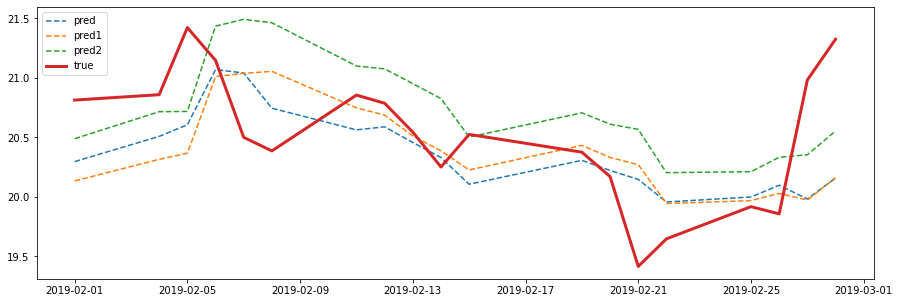

In [161]:
plt.figure(figsize=(15,5))
plt.plot(df201902.index[-19:], pred201902_n.flatten(), ls='--')
plt.plot(df201902.index[-19:], pred201902_1.flatten(), ls='--')
plt.plot(df201902.index[-19:], pred201902_2.flatten(), ls='--')
plt.plot(df201902.index[-19:], df201902[-19:].values, lw=3)
plt.legend(['pred', 'pred1', 'pred2', 'true'])
plt.show()